In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from model import ExpressionClassifier
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from random import choice
import torchvision
import numpy as np

In [2]:
def imshow(img,text=None,should_save=False):
    npimg = torchvision.utils.make_grid(img).numpy()
    plt.axis("off")
    if text:
        text1, text2 = text
        plt.text(110, 18, text1, fontweight='bold', horizontalalignment='center',
            bbox=dict(facecolor='white'))
        plt.text(340, 18, text2, fontweight='bold', horizontalalignment='center',
            bbox=dict(facecolor='white'))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [3]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])
topil = transforms.ToPILImage()
totensor = transforms.Compose(valid_transforms.transforms[:-1])

In [4]:
test_set = list(Path('/home/khairulimam/datasets/lfw-mtcnn-182/').glob('*/*.jpg'))

In [5]:
classes = ['ANGER', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRAL', 'SADNESS', 'SURPRISE']

In [6]:
def predict(model, img):
    x = valid_transforms(img).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(x.unsqueeze(0))
        _, p = torch.max(logits, 1)
        return classes[p]

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = ExpressionClassifier(num_classes=7)
model2 = ExpressionClassifier(num_classes=7)

In [9]:
state1 = torch.load('../imfdb/model.pth')
state2 = torch.load('model.pth')
model1.load_state_dict(state1['state'])
model2.load_state_dict(state2['state'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [10]:
model1.to(device)
model2.to(device)
pass

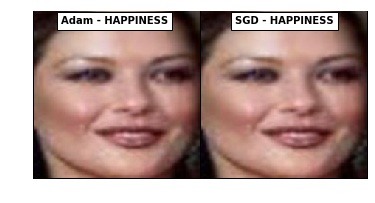

In [12]:
img = Image.open(choice(test_set))
x = totensor(img).unsqueeze(0)
model1_predict = predict(model1, img)
model2_predict = predict(model2, img)
imshow(torch.cat((x,x),0), (f'Adam - {model1_predict}', f'SGD - {model2_predict}'))